D:\课题组\OneDrive\课题组\NIR\opv\PP\PM6\20220107-622pump-10uw\220108_091601_averaged.dat


<IPython.core.display.Javascript object>


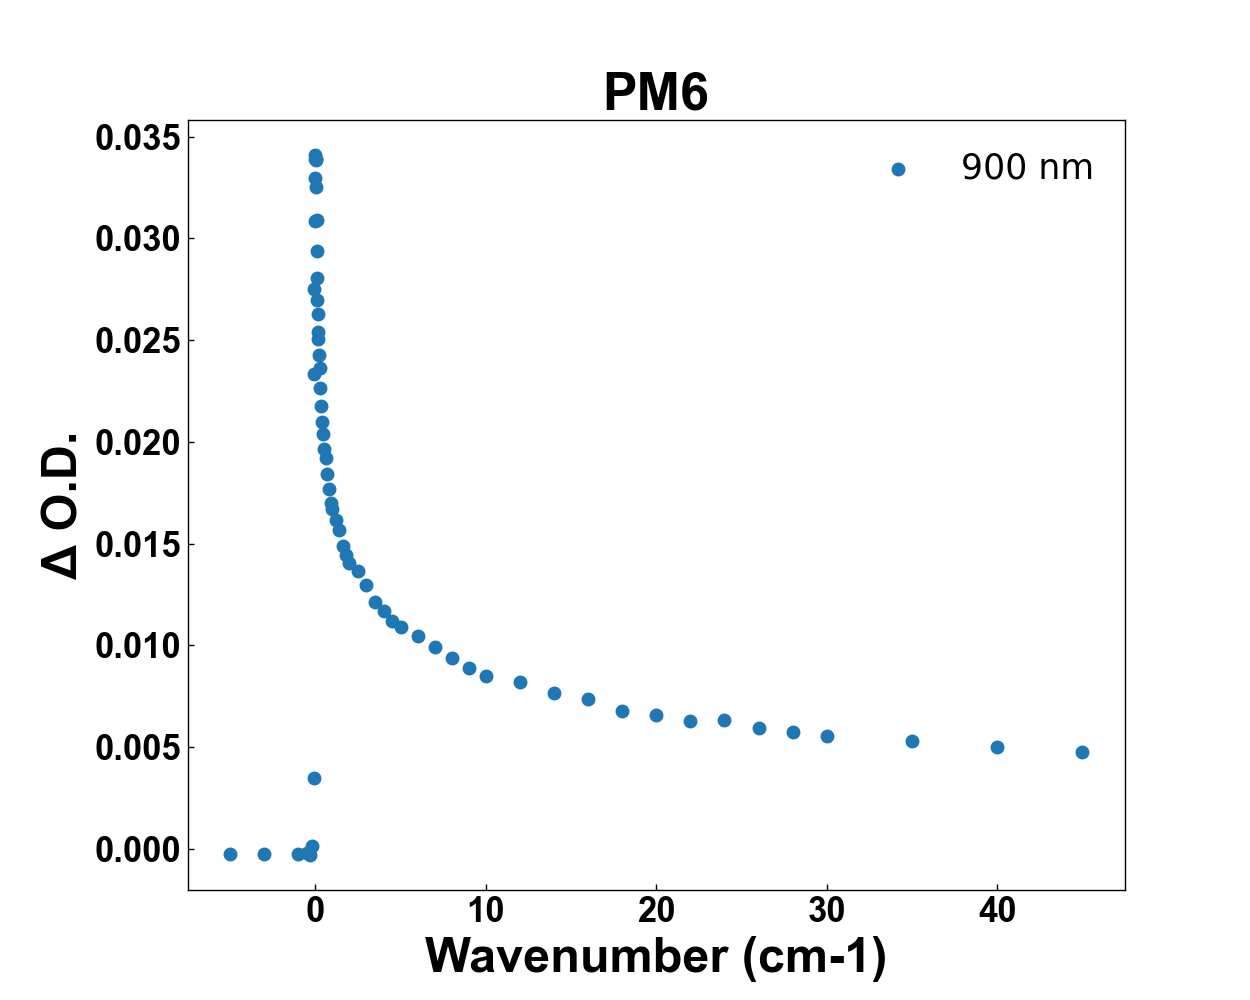

64 64


<IPython.core.display.Javascript object>


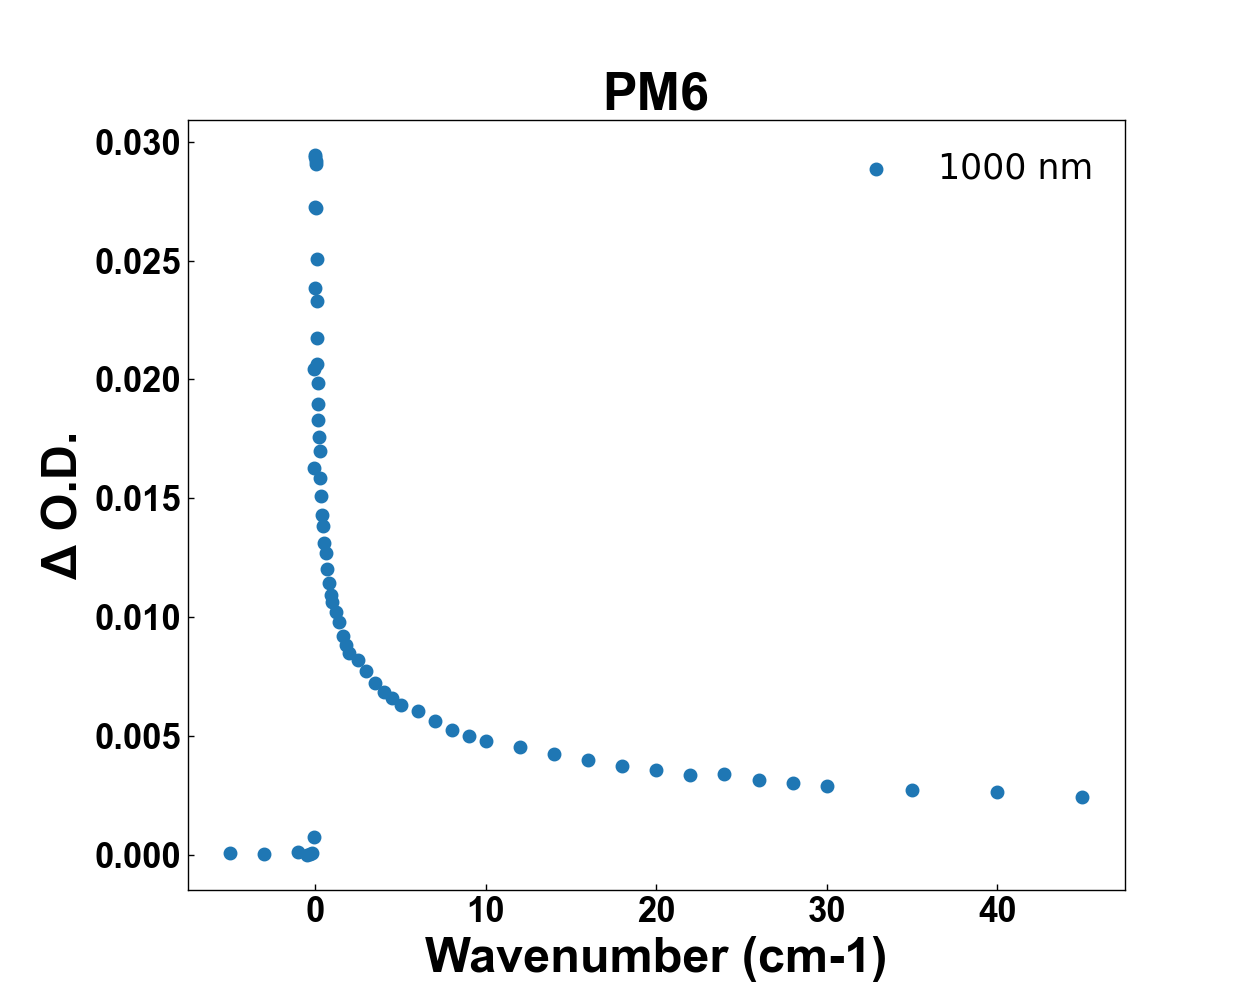

64 64


<IPython.core.display.Javascript object>


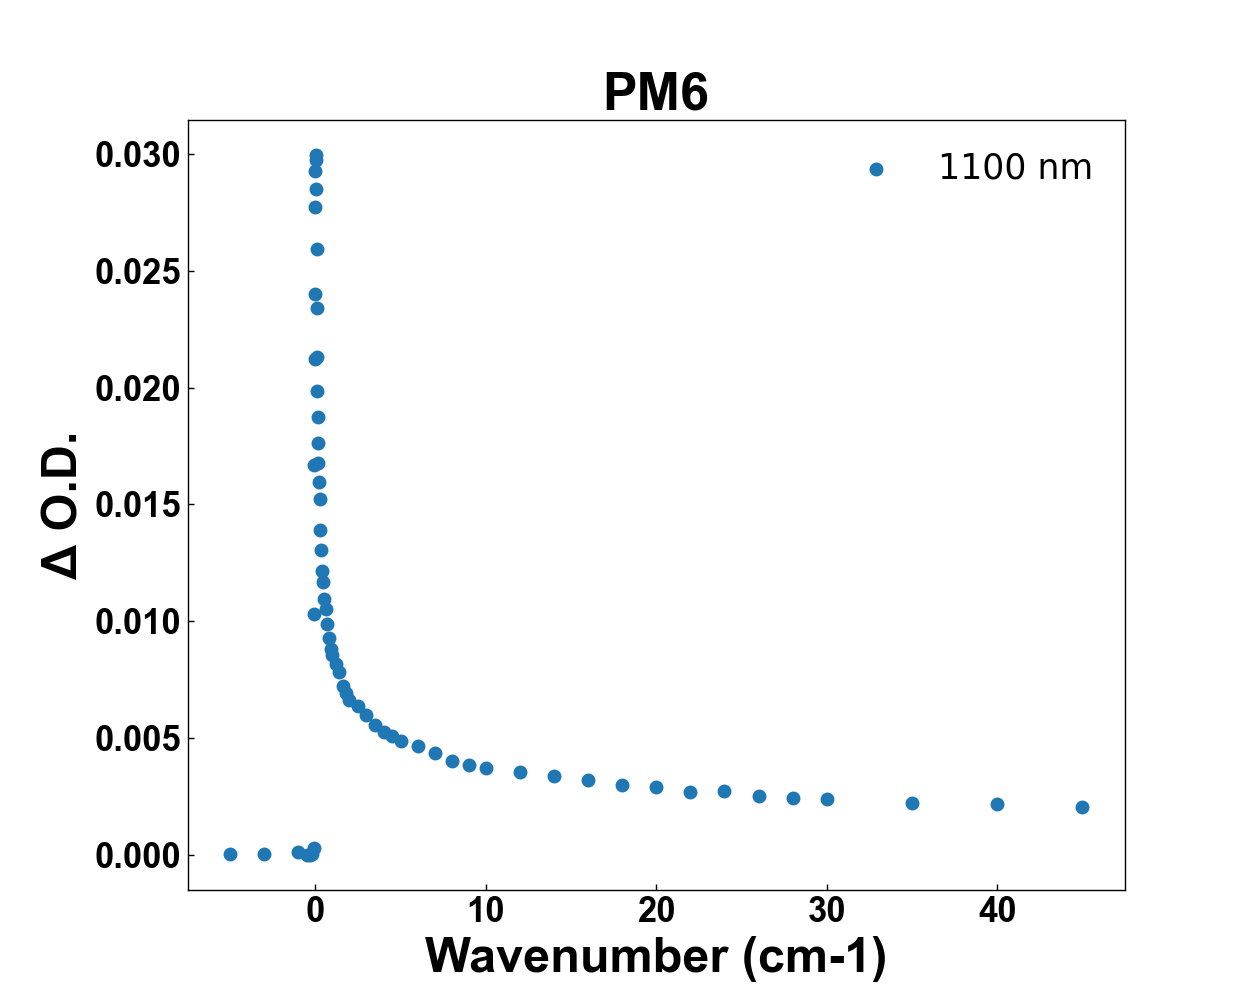

64 64


<IPython.core.display.Javascript object>


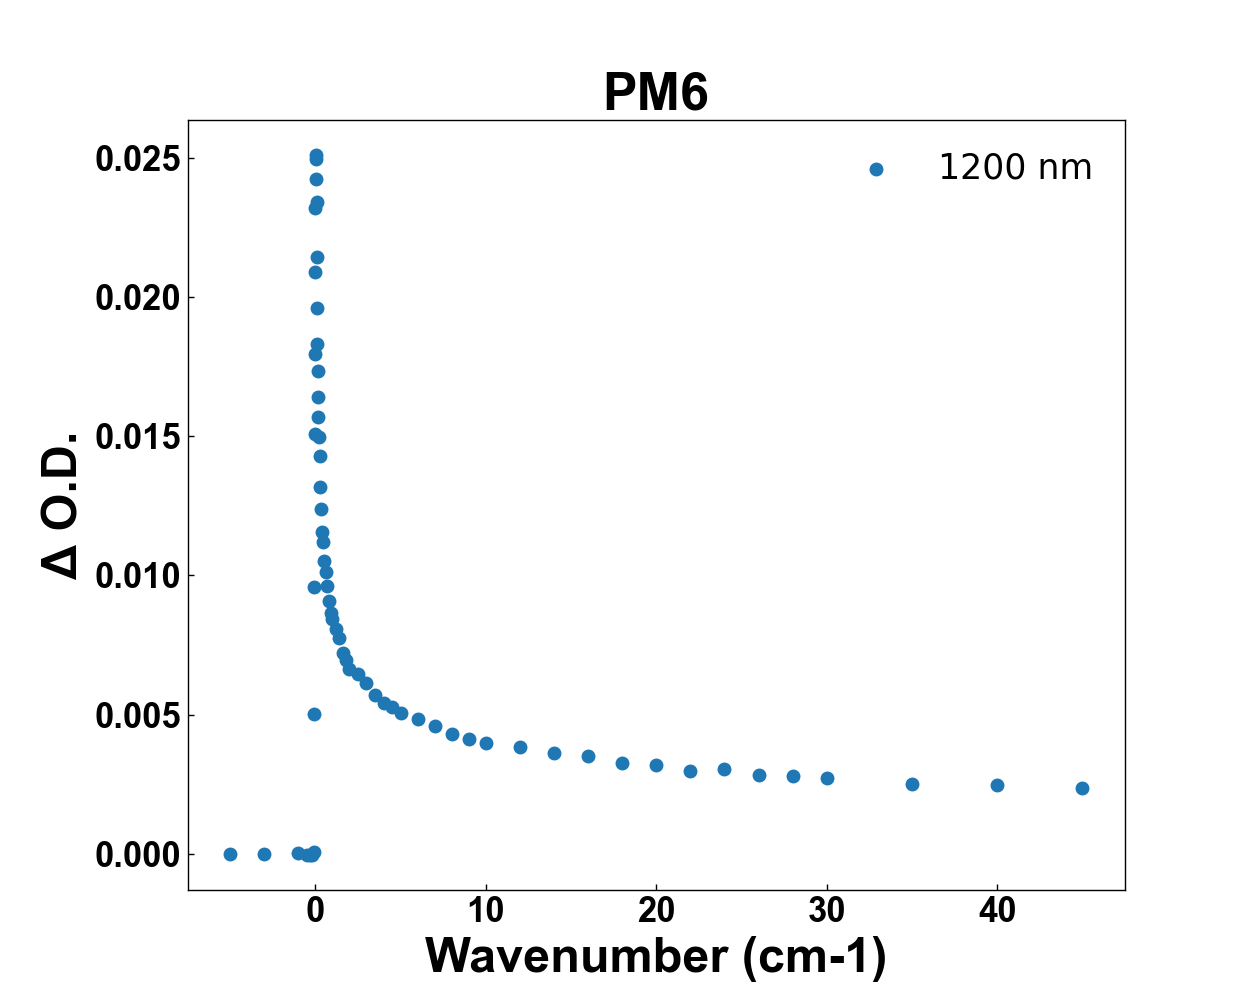

64 64
end


In [1]:
# drawing utils
%matplotlib notebook
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, colors
from matplotlib import animation
from scipy import optimize
from scipy import stats
import matplotlib.ticker
from matplotlib.colors import hsv_to_rgb
# from matplotlib.colors import hsv_to_rgb
#matplotlib.rcParams['text.usetex'] = True

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

from cycler import cycler

import os
import re


# math utils
import numpy as np

# statistics utils
import pandas as pd 

# 二维数据拆分
def parse_pp_data(file_path,delay_min, delay_max, selected_wavelength):
    rdata = np.loadtxt(file_path)
    probe_wavelength = rdata[0,1:]
    selected_wavelength2 = probe_wavelength[np.searchsorted(probe_wavelength, selected_wavelength)]
    Delay = rdata[1:,0]
    delay_min_index = np.searchsorted(Delay, delay_min)
    delay_max_index = np.searchsorted(Delay, delay_max)
    Delay = Delay[delay_min_index:delay_max_index]
    data = rdata[delay_min_index:delay_max_index,np.searchsorted(probe_wavelength, selected_wavelength)]
#    data = data[1:][np.searchsorted(probe_wavelength, selected_wavelength)]
    Dmax = data.max()
    Dmin = data.min()
    return probe_wavelength, Delay, data, Dmax, Dmin

def plot_pp_decay(filepath, sample_name,figfolder_path, selected_wavelength, delay_min, delay_max):
    probe_wavlength,delay, data, dmax, dmin = parse_pp_data(filepath,delay_min, delay_max, selected_wavelength)
    figtitle = sample_name
    fig,ax = plt.subplots(figsize=(10,8))
    plt.title(figtitle,fontproperties='Arial', fontsize = 30, fontweight='bold')
    plt.xlabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.ylabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.xticks(fontproperties='Arial', size=20, weight='bold')
    plt.yticks(fontproperties='Arial', size=20, weight='bold')
    selected_wavelength2 = probe_wavlength[np.searchsorted(probe_wavlength, selected_wavelength)] 
    print(len(delay),len(data))
    ax.scatter(delay, data, linewidth=2, label=str(selected_wavelength) + ' nm')
    plt.subplots_adjust(left=0.15)
    ax.set(xlabel='Wavenumber (cm-1)', ylabel='Δ O.D.', title=figtitle)
#    ax.set(xlim=(probe_wavlength.min(), probe_wavlength.max()))
#    ax.set(ylim=(dmin,dmax*1.2))
    plt.title(figtitle,fontproperties='Arial', fontsize = 30, fontweight='bold')
    ax.legend(loc='upper right',ncol=4,fontsize= 20,frameon=False)
    plt.show()
    if not os.path.exists(r'./'+figfolder_path):
        print(r'./'+figfolder_path)
        os.makedirs(r'./'+figfolder_path)
#    figpath = delay+'.png'
#    print(figpath)   
    figpath=r'./'+figfolder_path+r'/'+sample_name+'_PP_Diff_Time.png'
    fig.savefig(figpath, dpi=200, format='png')

folder_path=r'D:\课题组\OneDrive\课题组\NIR\opv\PP\PM6\20220107-622pump-10uw'
#print(file_dict)
file_name=r'220108_091601_averaged.dat'
file_path = folder_path+'\\'+file_name
print(file_path)
sample_name = re.split(r'\\',folder_path)[-2]
folder_name =sample_name+'-'+re.findall(r'\\([0-9a-z-]+?)w',folder_path)[0]+'w'
delay_min = -5
delay_max = 50
wavelength_list = [900,1000,1100,1200]
for selected_wavelength in wavelength_list:
    plot_pp_decay(file_path, sample_name, folder_name, selected_wavelength,delay_min, delay_max)

print('end')